In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the datasets

In [6]:
df_train = pd.read_csv('../data/train.csv',)
df_test = pd.read_csv('../data/test.csv')
display(df_train)
display(df_test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data cleansing

In [7]:
def cleansing(df):
    #drop duplication which are non sense
    df = df.drop_duplicates()  
    df = df.drop_duplicates(subset=['Name']) # no passanger should have two records
    df = df.dropna(subset = ['Survived'])
    # unnecessary data
    deleted_columns = ['Name','Ticket','PassengerId','Cabin', 'Embarked']
    df = df.drop(deleted_columns, axis=1)
    print("cleaned data:")
    display(df)
    return df



In [8]:
df_train = cleansing(df_train)

cleaned data:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


# Search some patterns

In [9]:
c1 = df_train['Pclass'] ==1
c2 = df_train['Pclass'] == 2
c3 = df_train['Pclass'] == 3
c4 = df_train['Survived'] == 1
c5 = df_train['Survived'] == 0
c6 = df_train['Sex'] == 'male'
c7 = df_train['Sex'] == 'female'

In [10]:
def Pclasses_portions(df):
    sizes = [df[c1 & c4].shape[0], df[c1 & c5].shape[0],df[c2 & c4].shape[0],df[c2 & c5].shape[0] ,df[c3 & c4].shape[0], df[c3 & c5].shape[0]]
    labels = ['Pc=1& S =1','Pc=1& S =0','Pc=2& S =1','Pc=2& S =0','Pc=3& S =1','Pc=3& S =0']
    fig = plt.figure(layout='constrained', figsize=(8, 7),edgecolor=(0,1,0))
    subfigs = fig.subfigures(2, 2, wspace=0.01)
    # polt Pclass = 1
    ax0 =  subfigs[0,0].subplots(1, 1, sharey=True)
    ax0.set_title('Pclass = 1')
    ax0.pie([sizes[0],sizes[1]],labels=[labels[0],labels[1]],autopct=f'%1.1f%%',textprops={'fontsize': 10})
    # polt Pclass = 2
    ax1 =  subfigs[0,1].subplots(1, 1, sharey=True)
    ax1.set_title('Pclass = 2')
    ax1.pie([sizes[2],sizes[3]],labels=[labels[2],labels[3]],autopct='%1.1f%%',textprops={'fontsize': 10})
    # polt Pclass = 3
    ax2 =  subfigs[1,0].subplots(1, 1, sharey=True)
    ax2.set_title('Pclass = 3')
    ax2.pie([sizes[4],sizes[5]],labels=[labels[4],labels[5]],autopct='%1.1f%%',textprops={'fontsize': 10})
    # polt All in one
    ax3 =  subfigs[1,1].subplots(1, 1, sharey=True)
    ax3.set_title('All in one')
    ax3.pie(sizes,labels=labels,autopct='%1.1f%%',textprops={'fontsize': 10})
    
def sex_portions(df):
    sizes = [df[c6 & c4].shape[0], df[c6 & c5].shape[0], df[c7 & c4].shape[0], df[c7 & c5].shape[0]]
    labels = ['M & S =1','M & S =0','F & S =1','F & S =0']
    fig = plt.figure(layout='constrained', figsize=(6, 6),edgecolor=(0,1,0))
    subfigs = fig.subfigures(2, 2, wspace=0.01)
    # polt Male
    ax0 =  subfigs[0,0].subplots(1, 1, sharey=True)
    ax0.set_title('Male')
    ax0.pie([sizes[0],sizes[1]],labels=[labels[0],labels[1]],autopct=f'%1.1f%%',textprops={'fontsize': 10})
    # polt Female
    ax1 =  subfigs[0,1].subplots(1, 1, sharey=True)
    ax1.set_title('Female')
    ax1.pie([sizes[2],sizes[3]],labels=[labels[2],labels[3]],autopct='%1.1f%%',textprops={'fontsize': 10})

    # polt All in one
    ax3 =  subfigs[1,0].subplots(1, 1, sharey=True)
    ax3.set_title('All in one')
    ax3.pie(sizes,labels=labels,autopct='%1.1f%%',textprops={'fontsize': 10})
    
    
    

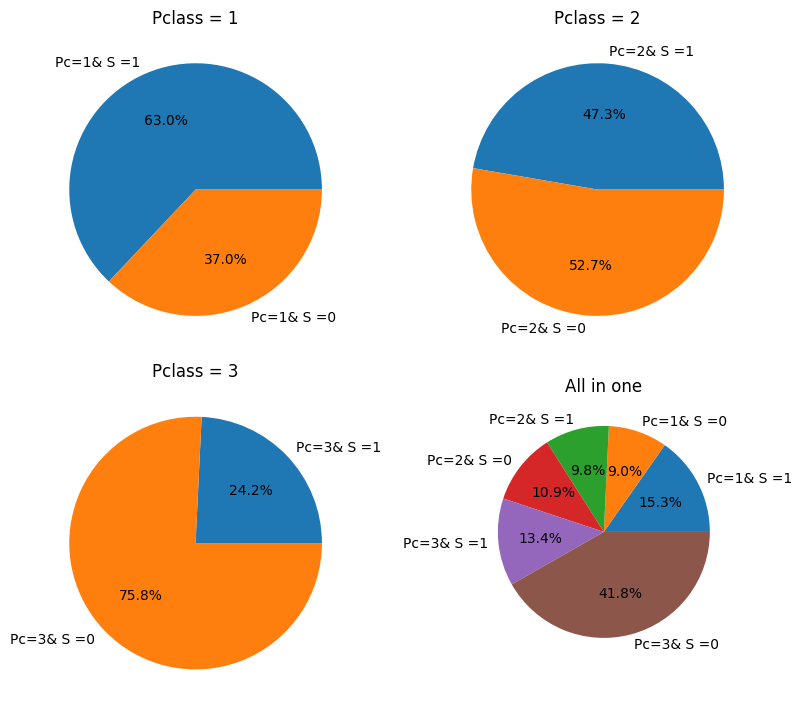

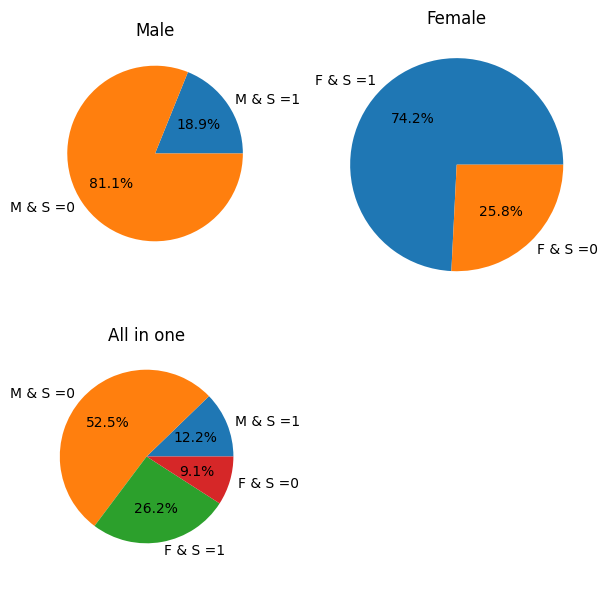

In [11]:
Pclasses_portions(df_train)
sex_portions(df_train)

## Feature Engineering

In [12]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [13]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
pd.get_dummies(df_train['Pclass'],dtype=int)
pd.concat([df_train,pd.get_dummies(df_train['SibSp'],dtype=int,prefix='SibSp')],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,3,male,22.0,1,0,7.2500,0,1,0,0,0,0,0
1,1,1,female,38.0,1,0,71.2833,0,1,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,1,0,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,0,1,0,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1,0,0,0,0,0,0
887,1,1,female,19.0,0,0,30.0000,1,0,0,0,0,0,0
888,0,3,female,NaN,1,2,23.4500,0,1,0,0,0,0,0
889,1,1,male,26.0,0,0,30.0000,1,0,0,0,0,0,0


In [14]:
from sklearn import preprocessing

ModuleNotFoundError: No module named 'sklearn'

In [15]:

def feature_engineering(df):
    df = df['Age']
    df = pd.concat([df_train,
                    pd.get_dummies(df_train['Pclass'],dtype=int,prefix='Plcass'),
                    pd.get_dummies(df_train['SibSp'],dtype=int,prefix='SibSp'),
                    pd.get_dummies(df_train['Parch'],dtype=int,prefix='Parch')
                    ]
                    ,axis=1)

    df = df.drop(columns=['Pclass','SibSp','Parch'])
    return df
df = feature_engineering(df_train.copy(deep=True))
df

,Survived,Sex,Age,Fare,Plcass_1,Plcass_2,Plcass_3,SibSp_0,SibSp_1,SibSp_2,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,male,22.0,7.2500,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,female,38.0,71.2833,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,female,26.0,7.9250,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,female,35.0,53.1000,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,male,35.0,8.0500,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,13.0000,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
887,1,female,19.0,30.0000,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
888,0,female,NaN,23.4500,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
889,1,male,26.0,30.0000,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
